In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# Load and clean dataset
df = pd.read_csv("/content/spotify.csv")
df.drop_duplicates(inplace=True)



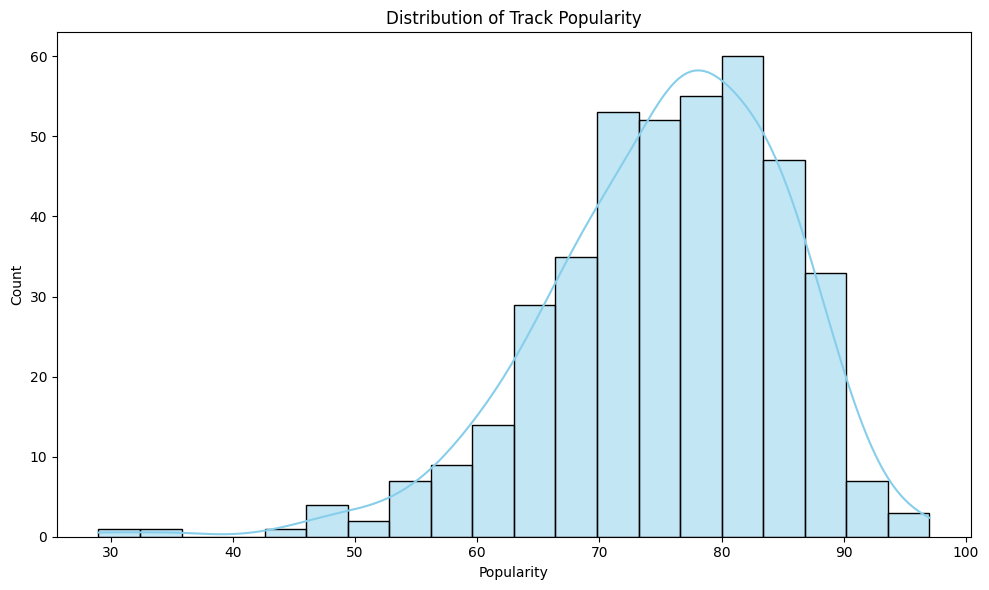

In [3]:
# 1. Distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



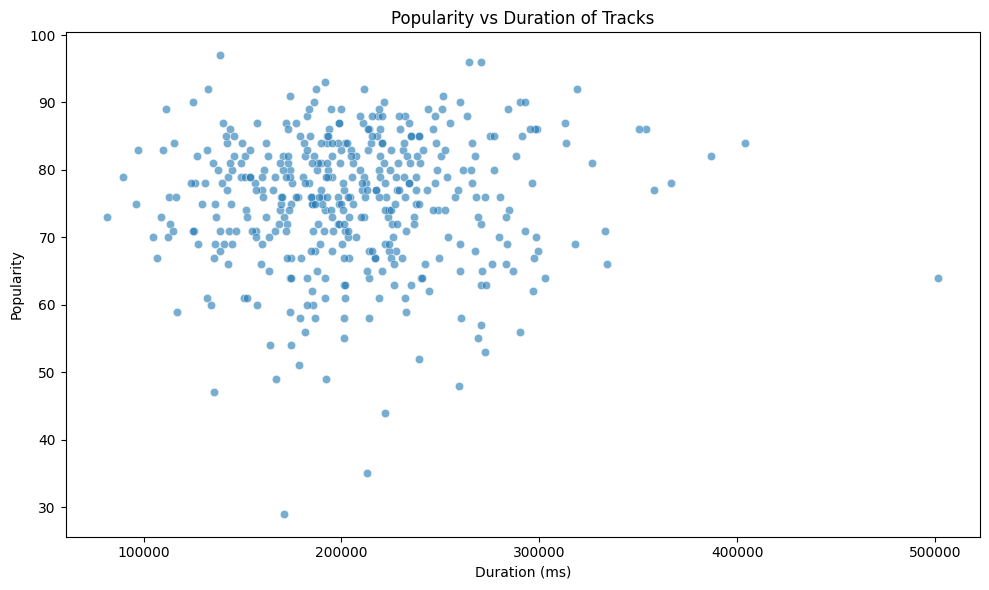

In [4]:
#2. Popularity vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()



<ipython-input-5-33ac24fdf971>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=top_artists.index[:10], palette='viridis')


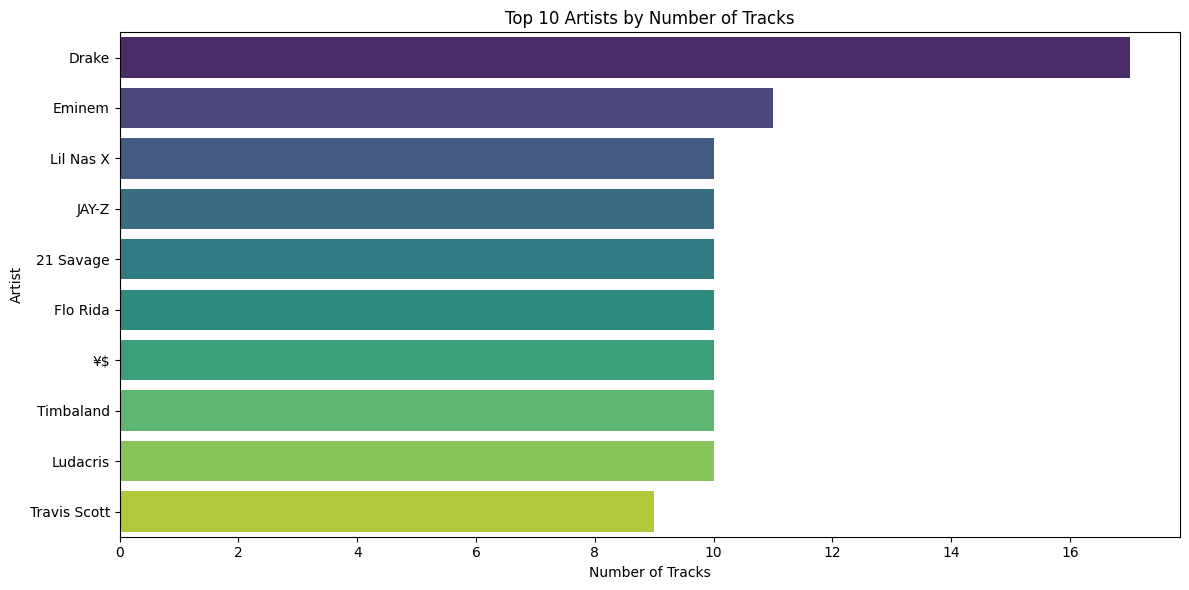

Artist with the most tracks: Drake


In [5]:
# 3. Most frequent artist
top_artists = df['Artist'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=top_artists.index[:10], palette='viridis')
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()
print("Artist with the most tracks:", top_artists.idxmax())



In [6]:
# 4. 5 least popular tracks
print("\nTop 5 Least Popular Tracks:")
print(df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name']])




Top 5 Least Popular Tracks:
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


In [7]:
# 5. Top 5 most popular artists by average popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Most Popular Artists by Average Popularity:")
print(top_5_artists)



Top 5 Most Popular Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [8]:

# 6. Most popular track by top 5 artists
print("\nMost Popular Track by Each of the Top 5 Artists:")
for artist in top_5_artists.index:
    top_track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).iloc[0]
    print(f"{artist}: {top_track['Track Name']} ({top_track['Popularity']})")




Most Popular Track by Each of the Top 5 Artists:
cassö: Prada (92)
Trueno: Mamichula - con Nicki Nicole (89)
David Guetta: Baby Don't Hurt Me (87)
Travis Scott: FE!N (feat. Playboi Carti) (93)
¥$: CARNIVAL (96)


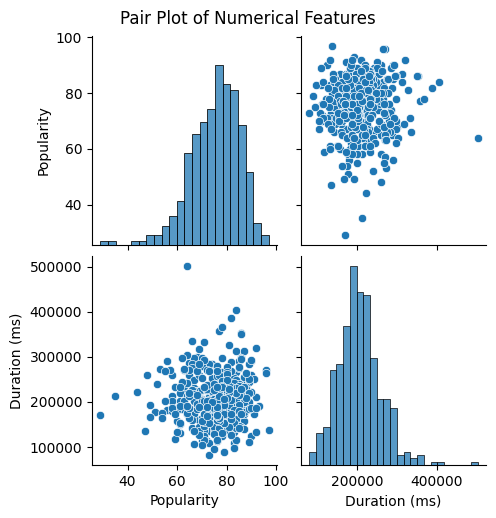

In [9]:
# 7. Pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


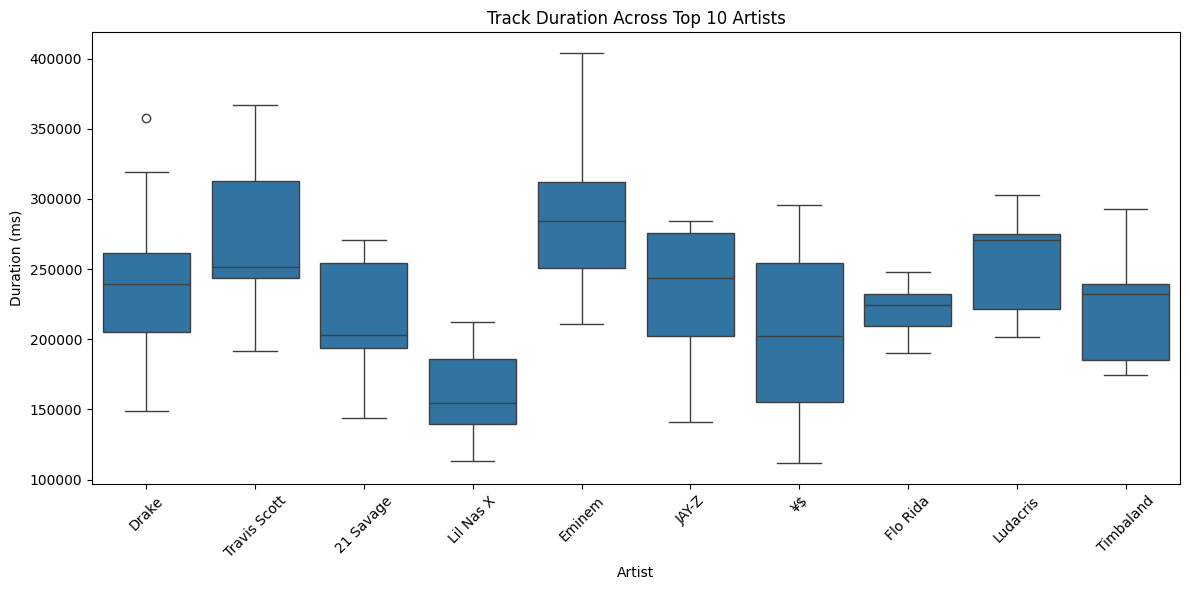

In [10]:

# 8. Box plot of duration per artist (top 10)
top_10_artists = df['Artist'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Artist'].isin(top_10_artists)], x='Artist', y='Duration (ms)')
plt.title("Track Duration Across Top 10 Artists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-11-8ec634cc8bfe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_10_artists)], x='Artist', y='Popularity', palette='Set2')


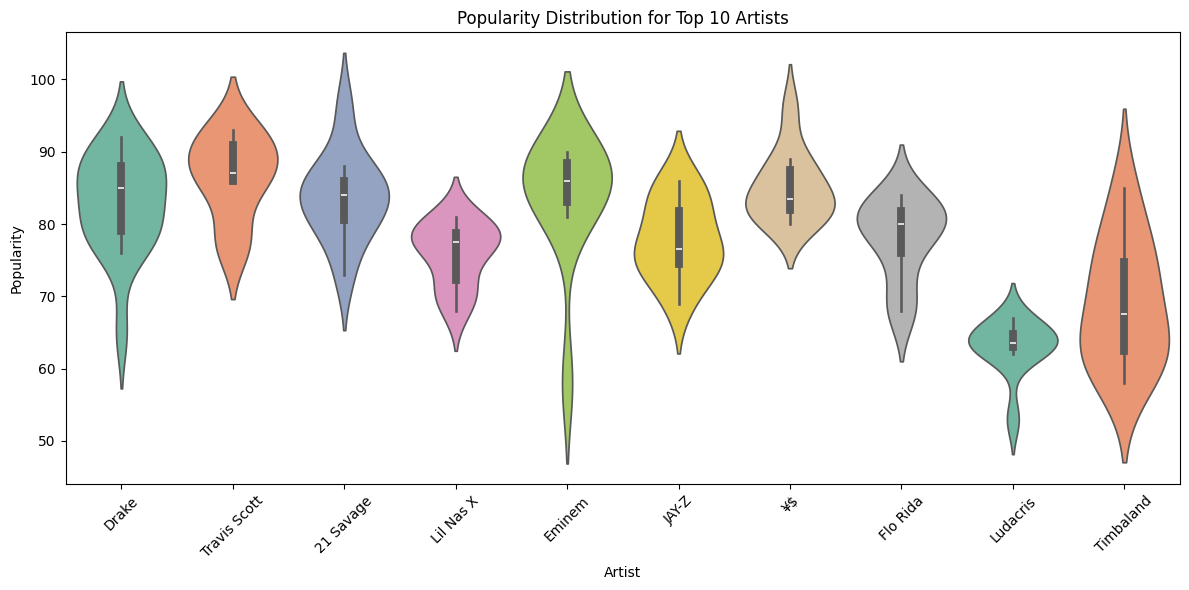

In [11]:

# 9. Violin plot for popularity per artist (top 10)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Artist'].isin(top_10_artists)], x='Artist', y='Popularity', palette='Set2')
plt.title("Popularity Distribution for Top 10 Artists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()